# Week 2 Workshop [Student]

### Import all necessary libraries

In [1]:
# you should be familiar with numpy from HW0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# we will use the iris dataset from sklearn.datasets
from sklearn import datasets

In [2]:
# Read the iris dataset and translate to pandas dataframe
iris_sk = datasets.load_iris()
#display(iris_sk)
# Note that the "target" attribute is species, represented as an integer
data = pd.DataFrame(data= np.c_[iris_sk['data'], iris_sk['target']],columns= iris_sk['feature_names'] + ['target'])

In [3]:
# Check rows and columns
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2.1 Sampling [Follow] (20 mins)

### Q1: Stratified sampling
In this part, you will be writing code to do stratified sampling. You should sample the *same number* of rows for each value of the given attribute.
You can use only pandas library calls for this problem.

**Hint**: You should read about the [split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) coding pattern in Pandas before starting this problem! In particular pay attention to the following:
* [Splitting an object into groups](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#splitting-an-object-into-groups)
* [Transformation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#transformation)

How could you collect a sample from each species, and then combine them?


The best way to do stratified sampling is with the `groupby` function from Pandas. You will see more about `groupby` in Seminar 4. It allow us to split the data into groups and then apply a function to each. For example, below we get the mean sepal length of each target class.

In [4]:
data.groupby('target')['sepal length (cm)'].mean()

target
0.0    5.006
1.0    5.936
2.0    6.588
Name: sepal length (cm), dtype: float64

The `apply` function allows us to apply a function to each group, and combine the results. We can use this for _stratified_ sampling.

In [5]:
# BEGIN SOLUTION
stratified_data = data.groupby('target').apply(lambda x: x.sample(n=5))
# Show the stratified dataframe
stratified_data

sepal length (cm)  sepal width (cm)  petal length (cm)  \
target                                                               
0.0    29                 4.7               3.2                1.6   
       47                 4.6               3.2                1.4   
       42                 4.4               3.2                1.3   
       6                  4.6               3.4                1.4   
       34                 4.9               3.1                1.5   
1.0    91                 6.1               3.0                4.6   
       98                 5.1               2.5                3.0   
       77                 6.7               3.0                5.0   
       83                 6.0               2.7                5.1   
       86                 6.7               3.1                4.7   
2.0    148                6.2               3.4                5.4   
       147                6.5               3.0                5.2   
       128                6.4               2.8                5.6   
       144                6.7               3.3                5.7   
       114                5.8               2.8                5.1   

            petal width (cm)  target  
target                                
0.0    29                0.2     0.0  
       47                0.2     0.0  
       42                0.2     0.0  
       6                 0.3     0.0  
       34                0.2     0.0  
1.0    91                1.4     1.0  
       98                1.1     1.0  
       77                1.7     1.0  
       83                1.6     1.0  
       86                1.5     1.0  
2.0    148               2.3     2.0  
       147               2.0     2.0  
       128               2.1     2.0  
       144               2.5     2.0  
       114               2.4     2.0

Try running the sampling procedure multiple times to see how the output is different each time.

Now, **plot the data on a Histogram** to show that it is equally sampled.

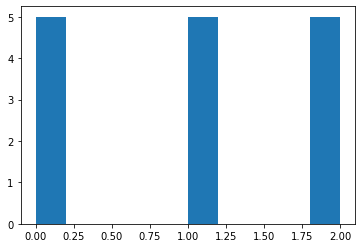

In [6]:
# BEGIN SOLUTION
plt.hist(stratified_data["target"])
plt.show()
# END SOLUTION

In [7]:
# Checking to make sure that there are 5 of each type
np.testing.assert_equal(sum(stratified_data["target"] == 0),5)
np.testing.assert_equal(sum(stratified_data["target"] == 1),5)
np.testing.assert_equal(sum(stratified_data["target"] == 2),5)
assert any([(data.iloc[i,:] == stratified_data.iloc[0,:]).all() for i in data.index])

# Workshop 1 (Group)

### Import all necessary libraries

In [ ]:
# you should be familiar with numpy from HW0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# we will use the iris dataset from sklearn.datasets
from sklearn import datasets

In [ ]:
# Read the iris dataset and translate to pandas dataframe
iris_sk = datasets.load_iris()
# Note that the "target" attribute is species, represented as an integer
data = pd.DataFrame(data= np.c_[iris_sk['data'], iris_sk['target']],columns= iris_sk['feature_names'] + ['target'])

In [ ]:
# Check rows and columns
data

## 2.1 Sampling [Group] (20 mins)

### EX1: Random Sampling
Now you'll be exploring pandas built in sampling library. Check the `sample` [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) for more information. 

1) Sample 30 rows from a dataframe **without** replacement.

In [ ]:
sample_30 = None
sample_30

Again, try running the sampling procedure multiple times to see how the output is different each time.

Now, **plot the data on a Histogram** to show that it is equally sampled.

In [ ]:
# Look at the distribution of the species (target attribute)
# How evenly are the species distributed with random sampling?
# Try running it again - are the results the same?



2) Sample 40 rows from a dataframe **with** replacement

In [ ]:
sample_40 = None
sample_40

In [ ]:
# If you check how rows are remaining after the duplicates are dropped
# It should be less than 40.
# (However there's a decent chance it might not be since random is random)
# (Run the sampling procedure multiple times just in case)
print("Number of rows after duplicates are dropped", sample_40.drop_duplicates().shape[0])

In [ ]:
#Drop duplicates for the row
assert(sample_40.drop_duplicates().shape[0] < 40)

3) Sometimes, when testing or profiling data mining algorithms, it's useful to keep the same data around for reproducabililty and to track down bugs in the algorithm. 

In most data mining libraries, you can **seed** your random process so that it "randomly" picks the same data everytime. Then, when you want your truly random data, you can take the seed parmater out.

Try this out by sampling with the `random_state` paramater

In [ ]:
sample_seeded = None

Run it again multiple times, and notice if it changes or not. What if you change the `random_state` number?

## 2.2 Discretization [Follow] (20 mins)

### Q2: Equal-Width discretization

In the following exercises, you will using Pandas to discretize a defined numpy vector into equal-width bins. The $n$ bins should all be of size $(max - min) / n$. In pandas, if a value falls directly on a break, it defaults to the lower break. 

Here's a webpage that explains more about `cut` and `qcut` | https://pbpython.com/pandas-qcut-cut.html

In [8]:
v = np.array([1, 6, 13, 40, 56, 7, 23, 43])

In a variable called `bin_5`, discritize `v` into 5 equal width bins.

In [9]:
bin_5 = pd.cut(v, bins=5, labels=False)
bin_5

array([0, 0, 1, 3, 4, 0, 1, 3], dtype=int64)

In [10]:
assert(np.array_equal(bin_5, np.array([0, 0, 1, 3, 4, 0, 1, 3])))

On the same data, now cut it into 3 bins of equal width. Store it in a variable called `bin_3`

In [11]:
# Fill in here!
# SOLUTION
bin_3 = pd.cut(v, bins=3, labels=False)

In [12]:
assert(np.array_equal(bin_3, np.array([0, 0, 0, 2, 2, 0, 1, 2])))

## 2.2 Discretization [Group] (10 mins)

### EX2: Equal-Depth discretization

In the following exercises, you will using Pandas to discretize a defined numpy vector into equal-width bins. The $n$ bins should all be of size $(total bins) / n$. In pandas, if a value falls directly on a break, it defaults to the lower break. 

Here's a webpage that explains more about `cut` and `qcut` | https://pbpython.com/pandas-qcut-cut.html

In [ ]:
v = np.array([1, 6, 13, 40, 56, 7, 23, 43])

In a variable called `bin_4`, discritize `v` into 4 equal depth bins.

In [ ]:
bin_4 = None
bin_4

In [ ]:
assert(np.array_equal(bin_4, np.array([0, 0, 1, 2, 3, 1, 2, 3])))

On the same data, now cut it into 2 bins of equal depth. Store it in a variable called `bin_2`

In [ ]:
bin_2 = None
bin_2

## 2.3 Dimensionality Reduction [Follow] (30 mins)

### Q3: Motivating PCA

Let's do a little bit of data viz. There's 4 features, but we can really see in 3-dimensions. However, let's try plotting a 3D scatter plot to see what we can gleam.

Write code to produce a three-dimensional scatter plot using the sepal length, sepal width and petal width as dimensions, and color the data points according to the class attribute. Here is some [documentation on 3D scatterplots](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)

Text(0.5, 0, 'petal width (cm)')

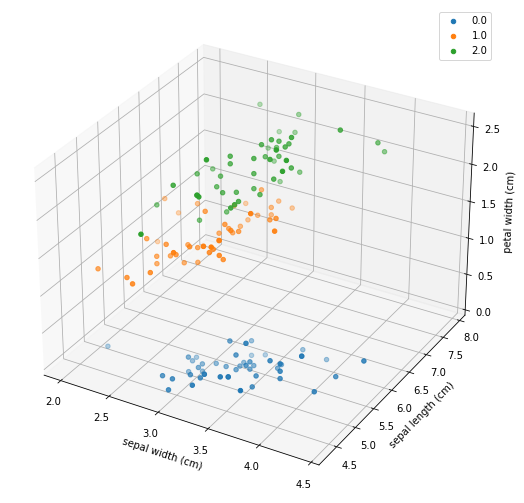

In [15]:
# SOLUTION
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 9))
#ax = Axes3D(fig)
ax = fig.add_subplot(projection="3d")
fig.add_axes(ax)

for grp_name, grp_idx in data.groupby('target').groups.items():
    y = data.iloc[grp_idx]["sepal length (cm)"]
    x = data.iloc[grp_idx]["sepal width (cm)"]
    z = data.iloc[grp_idx]["petal width (cm)"]
    ax.scatter(x,y,z, label=grp_name)  # this way you can control color/marker/size of each group freely

ax.legend()
ax.set_ylabel('sepal length (cm)')
ax.set_xlabel('sepal width (cm)')
ax.set_zlabel('petal width (cm)')

What patterns do you see in the data? How separable is the data?

If we transformed the data into 1 dimension, do you think we could get similar seperability? What about 2?

Now, we're going to perform a PCA on the Iris Dataset to see if we can gain any insight using dimensionality reduction.

Do a **one-dimensional** PCA of the iris dataset, and then plot the resulting vectors.

In [16]:
# Import PCA
from sklearn.decomposition import PCA

In [19]:
# Keep track of our data
X = iris_sk.data
Y = iris_sk.target

#Choose number of components
pca = PCA(n_components=1)

#Calculate PCA
pca.fit(X)

#Get PCA version of fitted data
transformed_X = pca.transform(X)
#transformed_X

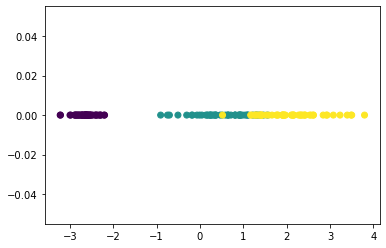

In [21]:
# Plot the results
plt.scatter(transformed_X[:, 0], np.zeros(len(X)), c = Y)
#plt.scatter(transformed_X, np.zeros(len(X)), c = Y)

## Interpret what this graph is saying in your own words. What parts of the data are seperable?

Now let's do this with two dimensional PCA.

In [22]:
# Keep track of our data
X = iris_sk.data
Y = iris_sk.target

#Choose number of components
pca = PCA(n_components=2)

#Calculate PCA
pca.fit(X)

#Get PCA version of fitted data
transformed_X = pca.transform(X)

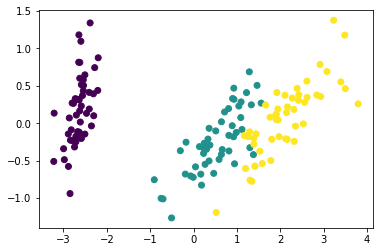

In [23]:
# Plot the results
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c = Y)

### Interpret what this graph is saying in your own words. Do we gain anymore information when we do a 2D PCA instead of 1D? Can we linearly seperate the green and yellow clusters?

## 2.3 Dimensionality Reduction [Group]

### EX3: Motivating PCA

#### Interpreting 1-D PCA
Write your thoughts down below

#### Interpret what this graph is saying in your own words. Do we gain anymore information when we do a 2D PCA instead of 1D? Can we linearly seperate the green and yellow clusters?

Write down your thoughts below

## 2.4 Data Visualization [Follow] (10 mins)

Now we're going to do some more data viz and EDA on the iris dataset.

Pandas has an easy way to view all the important descriptive statistics of a dataset, called `describe`.

### Q4: Summary Statistics

In [24]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


However, **something doesn't make sense in the above diagram**. Do you know what's wrong?

**ANSWER**: 

## Data Visualization [Group] (30 mins)

### EX4.A: Boxplots
Make a box-and-whisker plot for each feature (except the class attribute).

Be sure to include a title for each plot of what feature is being described.

[Making box-plots in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

Most times, you can pass in the `figsize` paramater to any pandas plotting function in case the resulting graph is too small. E.g `plt.hist(data, figsize=(10,2)`


In [ ]:
# SOLUTION (can break it up into multipole steps if you want to) (E.g "first we create a subset of the dataframe...")



### EX4.B: Scatter Matrix
A scatter matrix in an $n \times n$ grid of scatterplots, which plots every feature against every other feature. Since the diagonal of the scatter matrix would be plotting a variable against itself, most libraries substitute the diagonal with a histogram distribution of the feature.

Here's [documentation for using scatter matrix using the pandas library](https://pandas.pydata.org/docs/reference/api/pandas.plotting.scatter_matrix.html).

(Remember that if your figure is too small, you can pass in a `figsize` paramater.)

In [ ]:
# SOLUTION



## 2.5 Distance Functions [Follow] (10 mins)

Here, you will be learning how to manually implement distance functions.

Here you will be getting a hang of distance functions in scipy. [List of distance functions in scipy](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

### Q5: Euclidean Distance

In [25]:
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
iris_sk = datasets.load_iris()
# let's scale the data to [0, 1] range to ensure that all the features are in the same range.
iris_sk.data = MinMaxScaler().fit_transform(iris_sk.data)

# we'll be using the iris_df dataframe for visualization later
iris_df = pd.DataFrame(iris_sk.data, columns=iris_sk.feature_names)
# add class variable. Now, the iris dataframe (iris_df) also incldues the nominal class variable indicating 
# the species for each data point. 
iris_df['Species'] = iris_sk.target

# let's extract two random rows from the dataset. We'll use these rows for the distance metric calculations.
p = iris_sk.data[10, :]
q = iris_sk.data[50, :]

In [26]:
# Problem a: Euclidean Distance

def calculate_euclidean_distance(p , q):
    """
    Input: p and q are two numpy vectors of same dimensions. 
    Output: a single floating point value contaning the euclidean 
            distance between p and q
    
    Allowed numpy functions: sum, square, sqrt
    """
    
    ## BEGIN SOLUTION
    return np.sqrt(np.sum(np.square(p-q)))
    ## END SOLUTION

In [27]:
euclid_dist_10_50 = calculate_euclidean_distance(iris_sk.data[10, :], iris_sk.data[50, :])
euclid_dist_10_50

0.886059808594005

In [28]:
# Test your function against the offical distance function implementations!
np.testing.assert_almost_equal(calculate_euclidean_distance(iris_sk.data[10, :], iris_sk.data[50, :]), distance.euclidean(iris_sk.data[10, :], iris_sk.data[50, :]))
np.testing.assert_almost_equal(calculate_euclidean_distance(iris_sk.data[20, :], iris_sk.data[30, :]), distance.euclidean(iris_sk.data[20, :], iris_sk.data[30, :]))

## Distance Functions [Group] (20 mins)

Here you will be getting a hang of distance functions in scipy. [List of distance functions in scipy](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance

iris_sk = datasets.load_iris()
# let's scale the data to [0, 1] range to ensure that all the features are in the same range.
iris_sk.data = MinMaxScaler().fit_transform(iris_sk.data)

# we'll be using the iris_df dataframe for visualization later
iris_df = pd.DataFrame(iris_sk.data, columns=iris_sk.feature_names)
# add class variable. Now, the iris dataframe (iris_df) also incldues the nominal class variable indicating 
# the species for each data point. 
iris_df['Species'] = iris_sk.target

# let's extract two random rows from the dataset. We'll use these rows for the distance metric calculations.
p = iris_sk.data[10, :]
q = iris_sk.data[20, :]

### EX5.A: Cosine Similarity/Distance
Find the cosine distance between the 10th and 20th row in the dataset

In [ ]:
# https://neo4j.com/docs/graph-data-science/current/alpha-algorithms/cosine/
def calculate_cosine_distance(p, q):
    """
    Input: p and q are two numpy vectors of same dimensions. 
    Output: a single floating point value contaning the 
            cosine distance between p and q. 
    
    
    Allowed numpy functions: dot, sum, square, sqrt
    """

    ## BEGIN SOLUTION
    return None
    ## END SOLUTION


In [ ]:
cos_dis = None
cos_dis

In [ ]:
# Test your function against the offical distance function implementations!
np.testing.assert_almost_equal(cos_dist, distance.cosine(iris_sk.data[10, :], iris_sk.data[20, :]))

### EX5.B: $L_\infty$ Distance (Also called the Chebyshev Distance)

Find the $L_\infty$ distance between the 15th and 25th row in the dataset.

In [ ]:
def calculate_l_inf_distance(p, q):
    """
    Input: p and q are two numpy vectors of same dimensions. 
    Output: a single floating point value contaning the cosine distance between p and q. 
    
    Allowed numpy functions: max, abs
    
    """
    ## BEGIN SOLUTION
    return None
    ## END SOLUTION
    

In [ ]:
l_dist = calculate_l_inf_distance(iris_sk.data[15, :], iris_sk.data[25, :])
l_dist

In [ ]:
# Test your function against the offical distance function implementations!
np.testing.assert_almost_equal(l_dist,distance.chebyshev(iris_sk.data[15, :], iris_sk.data[25, :]))